<a href="https://colab.research.google.com/github/kimdesok/FinanceDataReader/blob/master/EconomyLeadingIndex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U finance-dataReader

     |████████████████████████████████| 48 kB 1.8 MB/s 


## Library import & parameters

In [72]:
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
from datetime import date, timedelta

plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (15,8)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

## Nasdaq Index

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13334 entries, 1971-02-05 to 2022-03-16
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   NASDAQCOM  13334 non-null  float64
 1   SP500      2608 non-null   float64
dtypes: float64(2)
memory usage: 312.5 KB
Displaying from 2020-04-16 00:00:00 to 2022-03-16 00:00:00
Displaying from 2022-01-06 00:00:00 to 2022-03-16 00:00:00


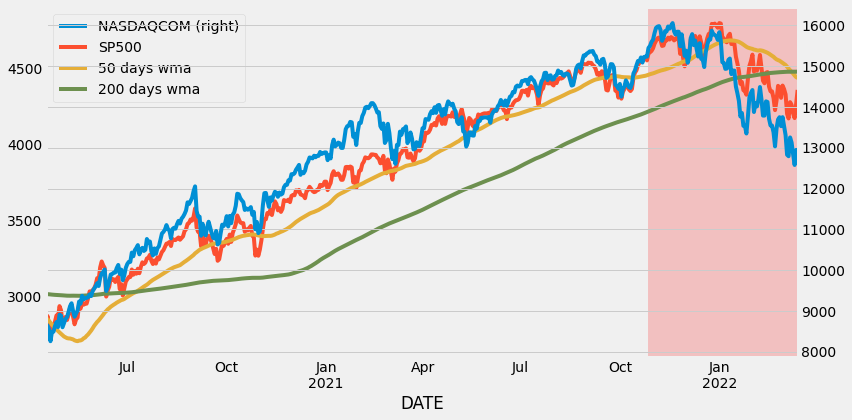

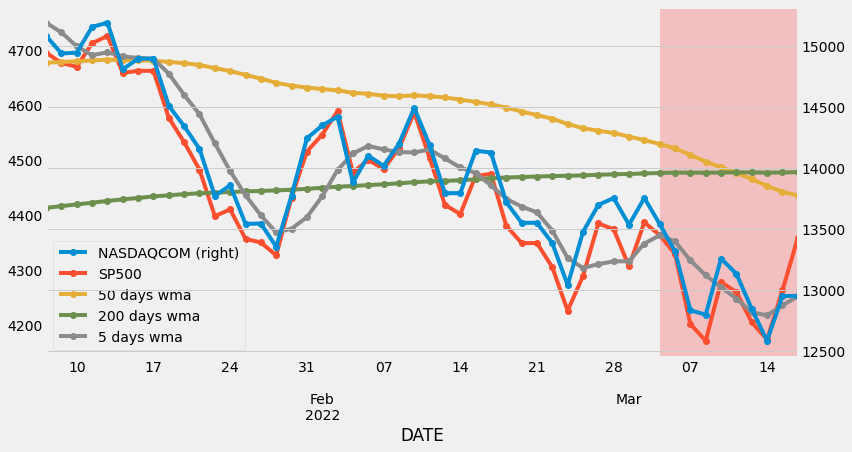

In [3]:
df = fdr.DataReader(['NASDAQCOM','SP500'], data_source='fred')
#df.plot()
#print(df.tail())

df.info()

#add 50 day moving average
#sf = df.copy()
df['50 days wma'] = df['SP500'].rolling(50).mean()

df['200 days wma'] = df['SP500'].rolling(200).mean()

#setting dates
start_date = df.index[-500]
end_date = df.index[-1] 
highlight_date = df.index[-100]
print('Displaying from ' + str(start_date) + ' to ' + str(end_date))


with plt.style.context('fivethirtyeight'):
  plt.rcParams["axes.grid"] = True
  plt.rcParams["figure.figsize"] = (12,6)
  plt.rcParams['axes.unicode_minus'] = False
  plt.rcParams["axes.formatter.limits"] = -10000, 10000
  #highlight recent data

  ax = df[start_date:].plot(secondary_y='NASDAQCOM')
  ax = ax.axvspan(highlight_date, end_date, color='red', alpha=0.2)


  #add 5 day moving average
  df['5 days wma'] = df['SP500'].rolling(5).mean()

  #highlight recent data
  start_date = df.index[-50]
  end_date = df.index[-1] 
  highlight_date = df.index[-10]
  print('Displaying from ' + str(start_date) + ' to ' + str(end_date))

  ax = df[start_date:].plot(marker='o', secondary_y='NASDAQCOM')
  ax = ax.axvspan(highlight_date, end_date, color='red', alpha=0.2)



##Initial Claims Seasonally Adjusted(ICSA) 
>* Unployment related claim data from FRED
>*  NASDAQ in the background

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16056 entries, 1970-01-03 to 2022-03-15
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   NASDAQCOM  15999 non-null  float64
 1   ICSA       16056 non-null  float64
dtypes: float64(2)
memory usage: 376.3 KB
None


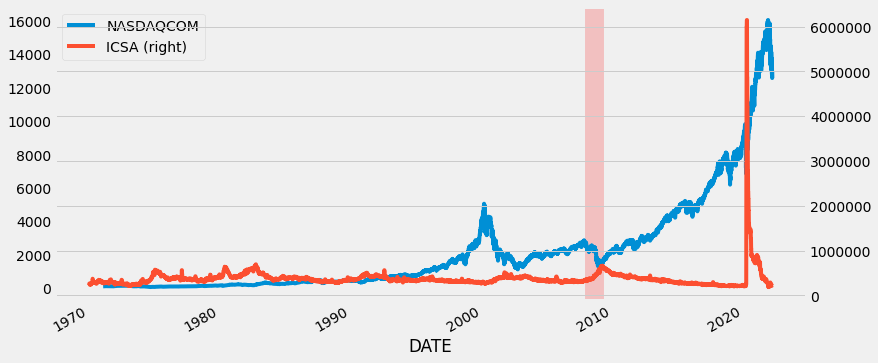

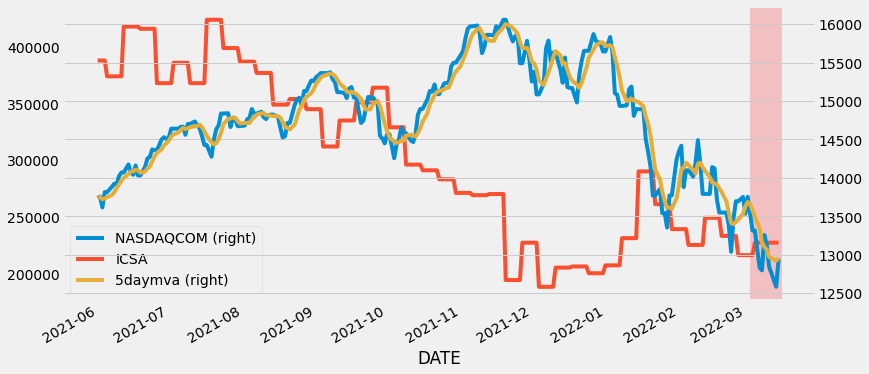

In [4]:
df1 = fdr.DataReader(['NASDAQCOM', 'ICSA'], data_source='fred')

with plt.style.context('fivethirtyeight'):
  plt.rcParams["axes.grid"] = True
  plt.rcParams["figure.figsize"] = (12,6)
  plt.rcParams['axes.unicode_minus'] = False
  plt.rcParams["axes.formatter.limits"] = -10000, 10000
  
  ax = df1.plot(secondary_y='ICSA')

  print(df1.info())

  #Highlight the financial crisis
  ax = ax.axvspan('2007-12-01', '2009-03-30', color='red', alpha=0.2)
  #add 5 day moving average
  df1['5daymva'] = df1['NASDAQCOM'].fillna(0).rolling(5).mean()
  ax = df1['2021-06':].plot(secondary_y=['NASDAQCOM','5daymva'])
  ax = ax.axvspan(highlight_date, end_date, color='red', alpha=0.2)

##Consumer Sentiment (UMCSENT)
https://fred.stlouisfed.org/series/UMCSENT
>* Peoples' sentiment on how the economy is going by Univ of Michigan Consumer Sentiment (UMCSENT)
>* Monthly 

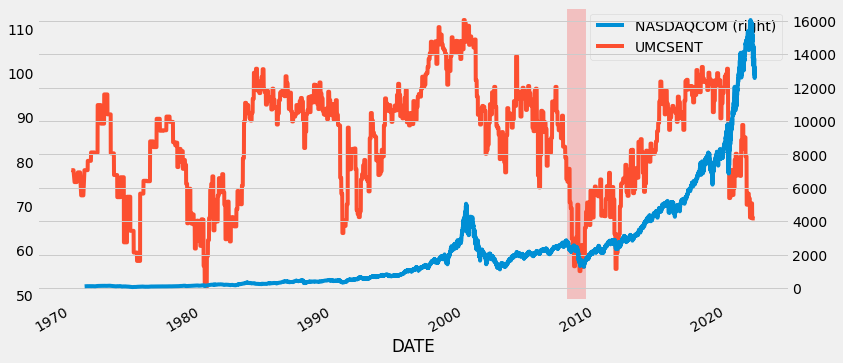

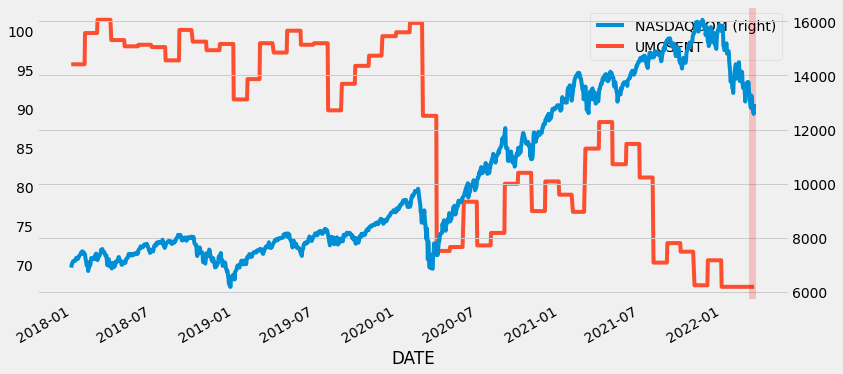

In [5]:
with plt.style.context('fivethirtyeight'):
  plt.rcParams["axes.grid"] = True
  plt.rcParams["figure.figsize"] = (12,6)
  plt.rcParams['axes.unicode_minus'] = False
  plt.rcParams["axes.formatter.limits"] = -10000, 10000
  
  df = fdr.DataReader(['NASDAQCOM', 'UMCSENT'], data_source='fred')
  ax = df.plot(secondary_y='NASDAQCOM')

  #highlight the financial crisis
  ax = ax.axvspan('2007-12-01', '2009-03-30', color='red', alpha=0.2)

  ax = df['2018':].plot(secondary_y=['NASDAQCOM', '5daymva'])
  ax = ax.axvspan(highlight_date, end_date, color='red', alpha=0.2)

New One Family Houses Sold: United States (HSN1F)

https://fred.stlouisfed.org/series/HSN1F
>* House sold data
>* Monthly


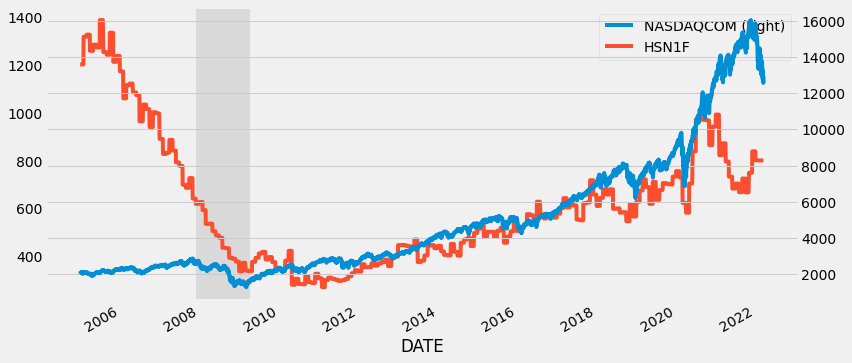

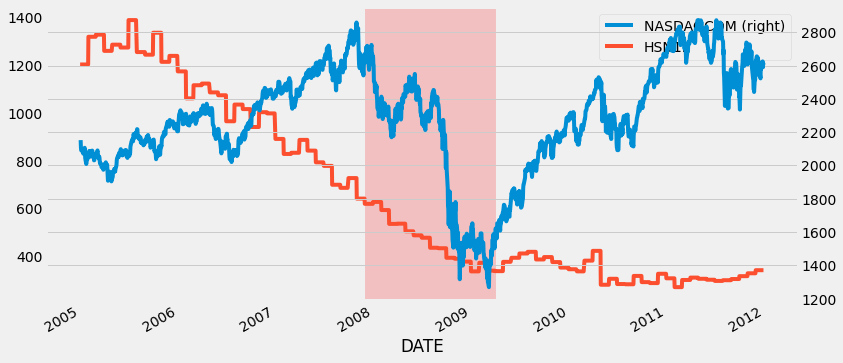

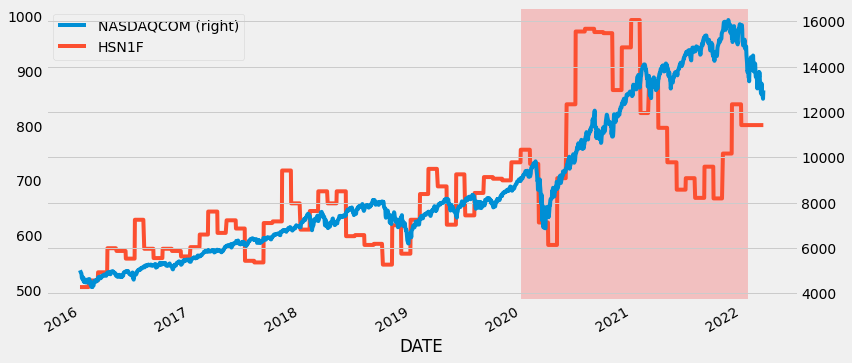

In [6]:
with plt.style.context('fivethirtyeight'):
  plt.rcParams["axes.grid"] = True
  plt.rcParams["figure.figsize"] = (12,6)
  plt.rcParams['axes.unicode_minus'] = False
  plt.rcParams["axes.formatter.limits"] = -10000, 10000
  df = fdr.DataReader(['NASDAQCOM', 'HSN1F'], start='2005', data_source='fred')
  ax = df.plot(secondary_y='NASDAQCOM')
  ax = ax.axvspan('2007-12-01', '2009-03-30', color='gray', alpha=0.2)

  # During the financial crisis
  ax = df['2003': '2011'].plot(secondary_y='NASDAQCOM')
  ax = ax.axvspan('2007-12-01', '2009-03-30', color='red', alpha=0.2)

  ax = df['2016':].plot(secondary_y='NASDAQCOM')
  ax = ax.axvspan('2020-01-01', '2022-01-19', color='red', alpha=0.2)

##Unemployment rate (UNRATE)

https://fred.stlouisfed.org/series/UNRATE

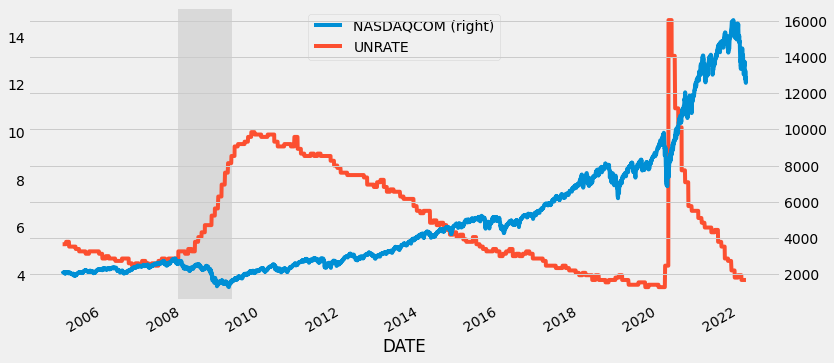

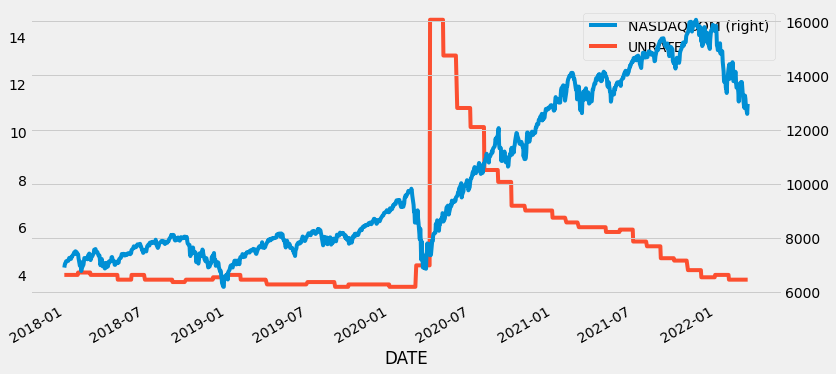

In [7]:
with plt.style.context('fivethirtyeight'):
  plt.rcParams["axes.grid"] = True
  plt.rcParams["figure.figsize"] = (12,6)
  plt.rcParams['axes.unicode_minus'] = False
  plt.rcParams["axes.formatter.limits"] = -10000, 10000
  df = fdr.DataReader(['NASDAQCOM', 'UNRATE'], start='2005', data_source='fred')
  ax = df.plot(secondary_y='NASDAQCOM')
  ax = ax.axvspan('2007-12-01', '2009-03-30', color='gray', alpha=0.2)

  ax = df['2018':].plot(secondary_y='NASDAQCOM')

##M2SL Money stock measures

>* Money poured into the market by the government to sustain the economy otherwise not functional well
>* Original M2 discontinued and replaced by M2SL 

https://fred.stlouisfed.org/series/M2SL

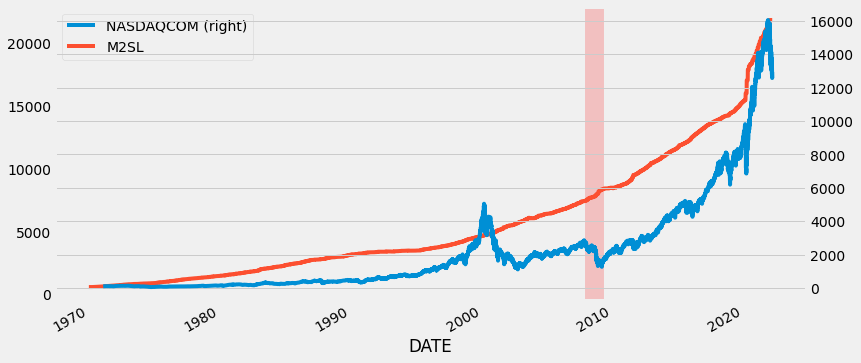

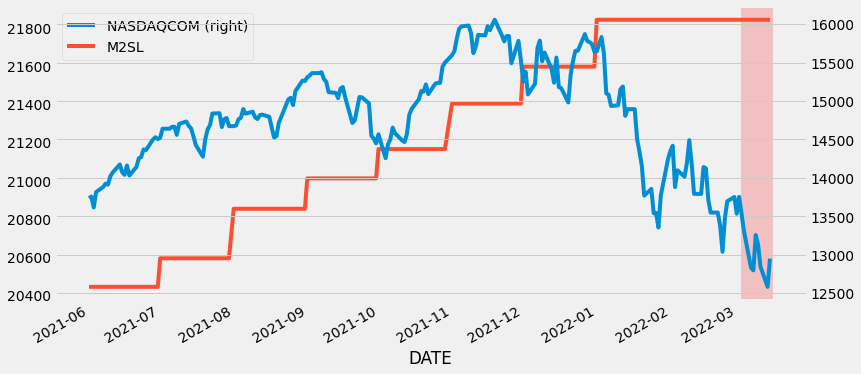

In [8]:
with plt.style.context('fivethirtyeight'):
  plt.rcParams["axes.grid"] = True
  plt.rcParams["figure.figsize"] = (12,6)
  plt.rcParams['axes.unicode_minus'] = False
  plt.rcParams["axes.formatter.limits"] = -10000, 10000
  df = fdr.DataReader(['NASDAQCOM', 'M2SL'], data_source='fred')
  ax = df.plot(secondary_y='NASDAQCOM')
  ax = ax.axvspan('2007-12-01', '2009-03-30', color='red', alpha=0.2)
  ax = df['2021-06':].plot(secondary_y='NASDAQCOM')
  ax = ax.axvspan(highlight_date, end_date, color='red', alpha=0.2)

##High yield bond spread (BAMLH0A0HYM2)

https://fred.stlouisfed.org/series/BAMLH0A0HYM2

It is a high risk high yield bond that invests on higher interest rates because they have lower credit ratings than investment-grade bonds. 

High-yield bonds are more likely to default, so they must pay a higher yield than investment-grade bonds to compensate investors. 

From
https://www.investopedia.com/terms/h/high_yield_bond.asp

The spread means the difference to the government bond

When the economy is getting bad, the spread gets larger.

The spread named as 'ICE BofA US High Yield Index Option-Adjusted Spread' is provided from FRED.

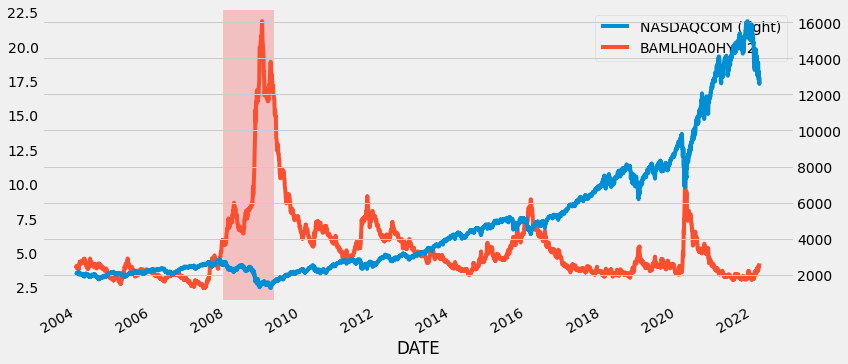

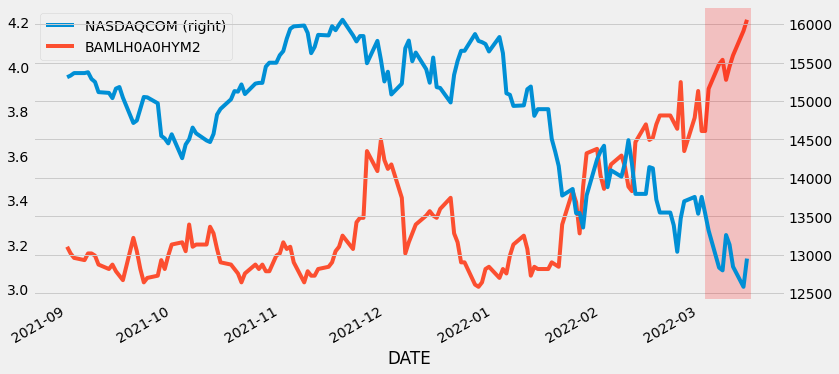

In [9]:
with plt.style.context('fivethirtyeight'):
  plt.rcParams["axes.grid"] = True
  plt.rcParams["figure.figsize"] = (12,6)
  plt.rcParams['axes.unicode_minus'] = False
  plt.rcParams["axes.formatter.limits"] = -10000, 10000
  df = fdr.DataReader(['NASDAQCOM', 'BAMLH0A0HYM2'], start='2004-01-01', end=end_date, data_source='fred')
  ax = df.plot(secondary_y='NASDAQCOM')
  ax = ax.axvspan('2007-12-01', '2009-03-30', color='red', alpha=0.2)

  #df['5daymva'] = df['NASDAQCOM']['2021-06-01':].fillna(0).rolling(5).mean()
  #df['5daymva_hybspread'] = df['BAMLH0A0HYM2']['2021-06-01':].fillna(0).rolling(5).mean()
  ax = df['2021-09-01':].plot(secondary_y=['NASDAQCOM','5daymva'])
  ax = ax.axvspan(highlight_date, end_date, color='red', alpha=0.2)

In [94]:
def bond_yield_graphs(start_date, end_date):
  print('Plotting from', start_date, ' to ', end_date)

  #S&P 500 Close
  df = fdr.DataReader('US500', start_date, end_date)
  df = df.pivot_table(index='Date', values=['Close'])
  #df.info()

  #Means
  df['exp_mean50'] = df['Close'].rolling(50).mean()
  df['exp_mean200'] = df['Close'].rolling(200).mean()

  #Bond Yields
  three_m_df = fdr.DataReader('US3MT=X', start_date, end_date)['Close'].rolling(5).mean()
  one_y_df = fdr.DataReader('US1YT=X', start_date, end_date)['Close'].rolling(5).mean()
  ten_y_df = fdr.DataReader('US10YT=X', start_date, end_date)['Close'].rolling(5).mean()
  df['dy0_df'] = ten_y_df - three_m_df
  #df['dy1_df'] = ten_y_df - one_y_df

  #Plotting
  df.plot(linewidth=2, secondary_y=['dy0_df', 'dy1_df'] )

  #h0 = df['Close'].plot(label='S&P500', linewidth=2)
  #h1 = df['exp_mean50'].plot(label='50 days ewm', color='green', alpha=0.5)
  #h2 = df['exp_mean200'].plot(label='200 days ewm', color='darkgray', alpha=0.5)
  #h2 = my_df.plot(label ='3 month yield', secondary_y=True, linewidth=2, color='darkorange', alpha=0.5)
  #h3 = yy_df.plot(label ='10 yr yield', secondary_y=True, linewidth=2, color='darkblue', alpha=0.5)

  #h4 = df['dy0_df'].plot(secondary_y=True, color='blue')

  #h5 = df['dy1_df'].plot(secondary_y=True, color='orange')

  plt.ylabel('Yields')
  plt.title('SP&500 & 50 & 200 days ave. along with the difference in short term and long term yields')
  plt.legend(['Yield Difference (10yr-3m)',  'Yield Difference (10yr-1yr)'], loc='lower left')
  plt.grid(True)
  plt.show()
  plt.close()

  plt.figure.figsize = (25,5)
  three_m_df.plot(label='Three month Bond')
  one_y_df.plot(label='One year Bond')
  ten_y_df.plot(label='Ten year Bond')
  plt.legend()
  plt.grid(True)
  plt.show()
  plt.close()


  #df.to_csv('out.csv')

#bond_yield_graphs('2020-01-01',  date.today())


Plotting from 2005-01-01  to  2010-01-01


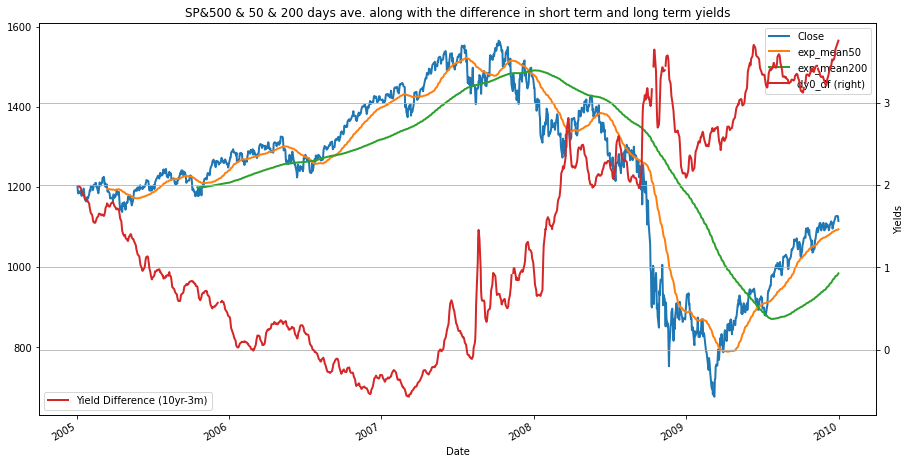

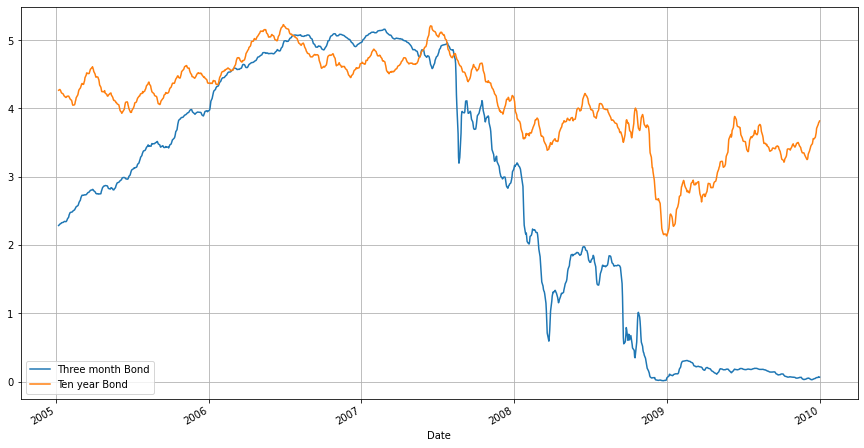

In [91]:
bond_yield_graphs('2005-01-01',  '2010-01-01')

Plotting from 2019-01-01  to  2022-03-17


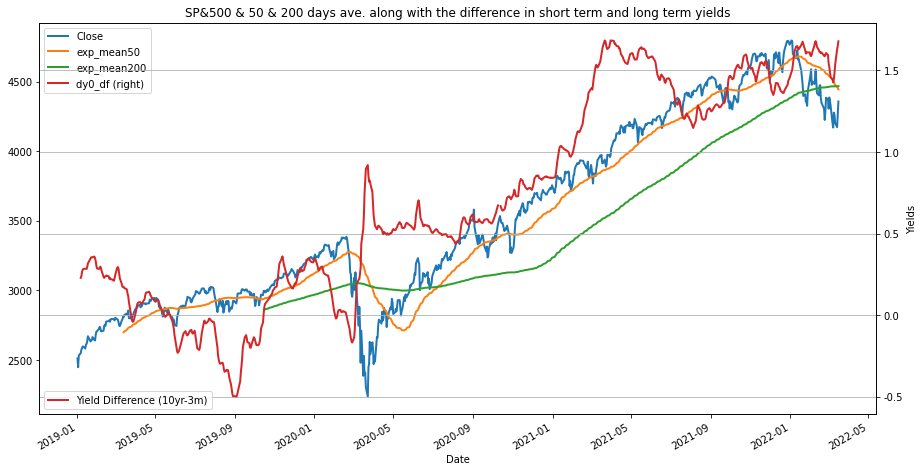

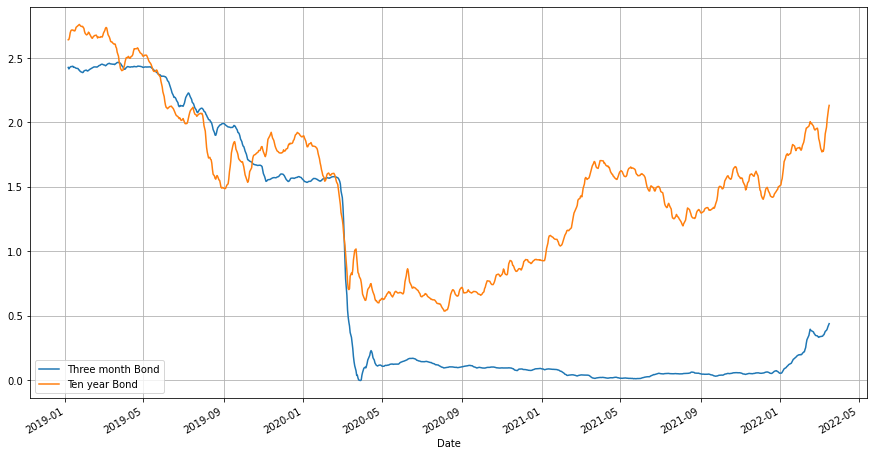

In [92]:
bond_yield_graphs('2019-01-01',  date.today())

Plotting from 2010-01-01  to  2015-01-01


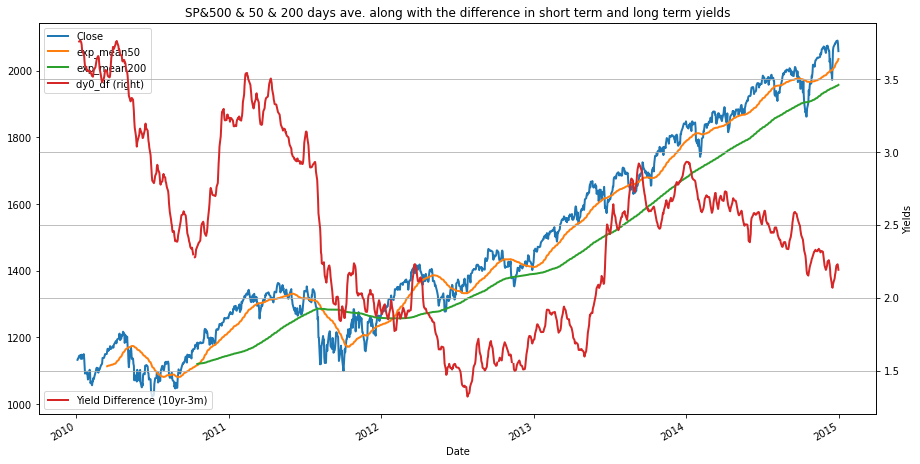

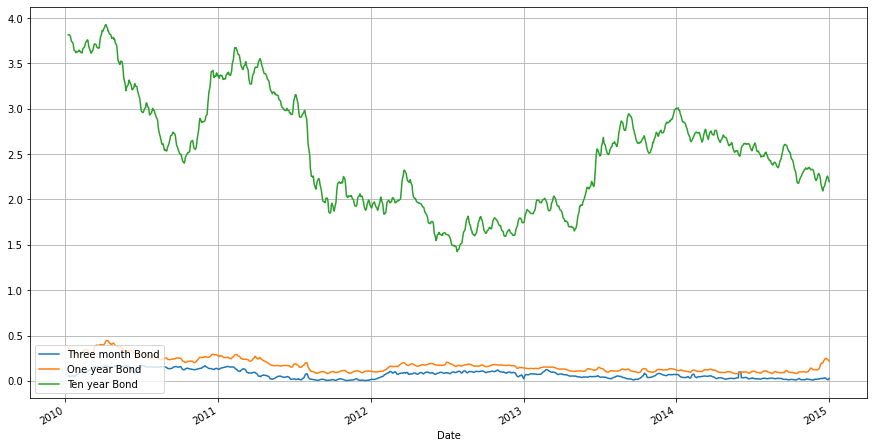

In [95]:
bond_yield_graphs('2010-01-01', '2015-01-01')

Plotting from 2015-01-01  to  2020-01-01


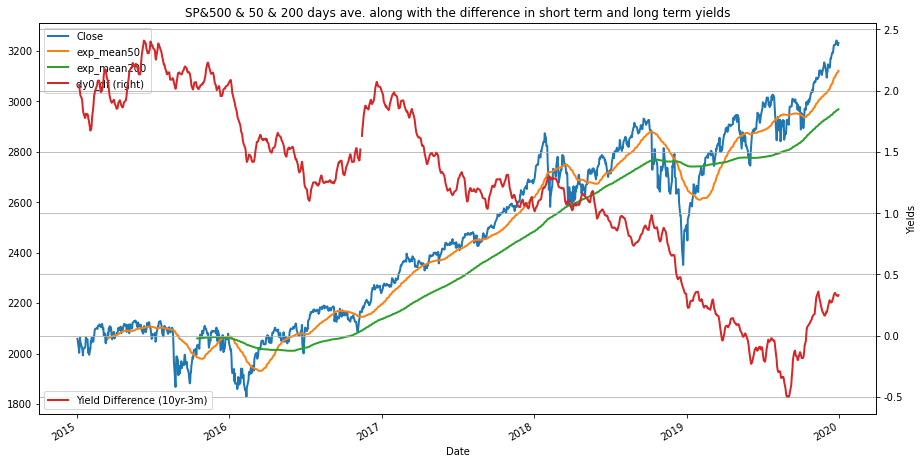

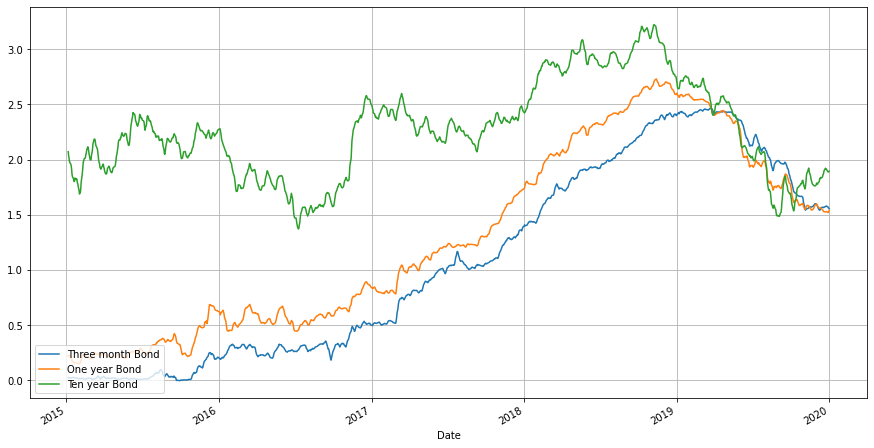

In [96]:
bond_yield_graphs('2015-01-01', '2020-01-01')